In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [46]:
from tensorflow.keras.datasets import mnist

In [47]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [48]:
X_train.shape

(60000, 28, 28)

In [49]:
X_test.shape

(10000, 28, 28)

In [50]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

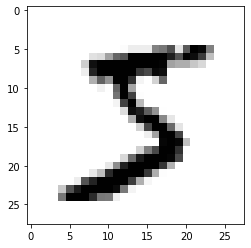

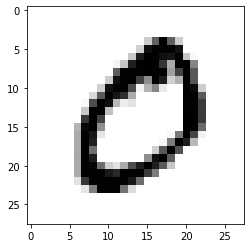

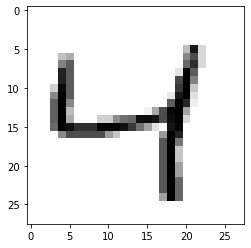

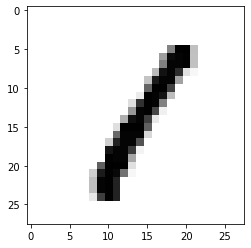

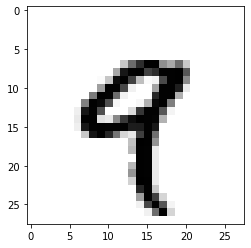

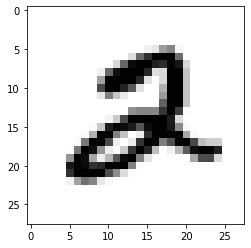

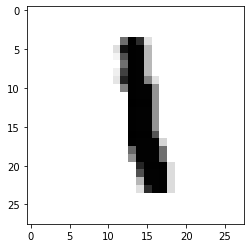

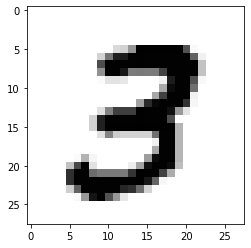

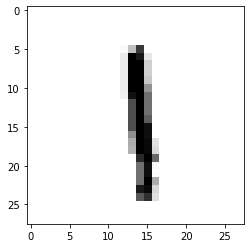

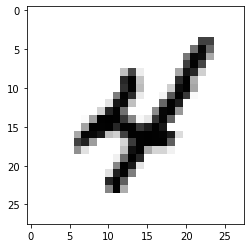

In [51]:
#plotting the first 10 elements

for i in range(10):
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.show()

In [52]:
#Normalizing
X_train = X_train/255.0
Y_train = Y_train/255.0
X_test = X_test/255.0
Y_test = Y_test/255.0

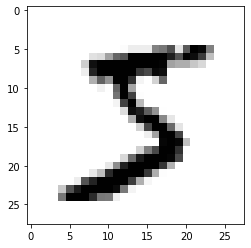

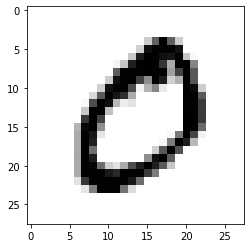

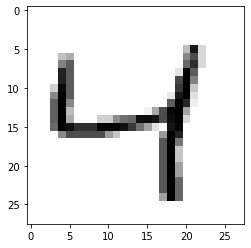

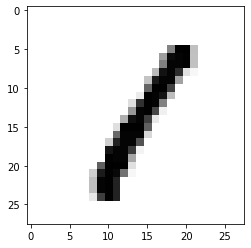

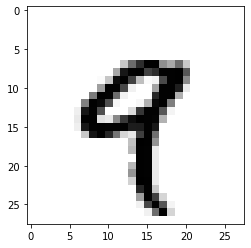

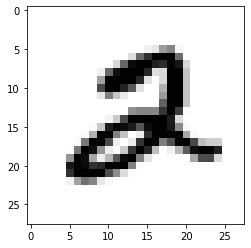

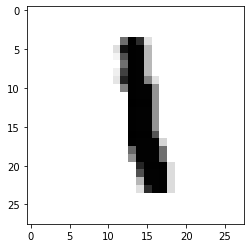

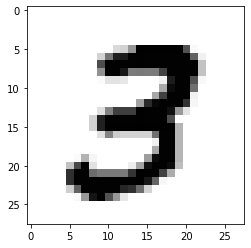

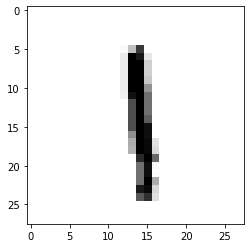

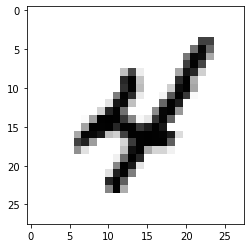

In [53]:
for i in range(10):
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.show()

In [54]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [55]:
X_train, X_test = np.expand_dims(X_train, axis=-1), np.expand_dims(X_test, axis=-1)

In [56]:
model = Sequential()

In [57]:
model.add(Conv2D(16,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))

model.add(Conv2D(32,(3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [59]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [60]:
hist = model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 5,batch_size = 64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 51s 846us/sample - loss: 0.0062 - accuracy: 0.0987 - val_loss: 0.0000e+00 - val_accuracy: 0.0980
Epoch 2/5
60000/60000 [==============================] - 51s 845us/sample - loss: 0.0000e+00 - accuracy: 0.0987 - val_loss: 0.0000e+00 - val_accuracy: 0.0980
Epoch 3/5
60000/60000 [==============================] - 52s 861us/sample - loss: 0.0000e+00 - accuracy: 0.0987 - val_loss: 0.0000e+00 - val_accuracy: 0.0980
Epoch 4/5
60000/60000 [==============================] - 52s 871us/sample - loss: 0.0000e+00 - accuracy: 0.0987 - val_loss: 0.0000e+00 - val_accuracy: 0.0980
Epoch 5/5
60000/60000 [==============================] - 53s 884us/sample - loss: 0.0000e+00 - accuracy: 0.0987 - val_loss: 0.0000e+00 - val_accuracy: 0.0980


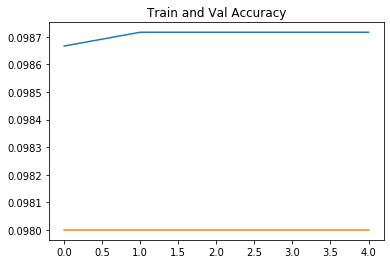

<Figure size 432x288 with 0 Axes>

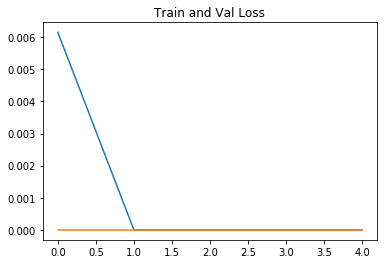

<Figure size 432x288 with 0 Axes>

In [61]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs,accuracy)
plt.plot(epochs,val_accuracy)
plt.title('Train and Val Accuracy')
plt.figure()
plt.show()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('Train and Val Loss')
plt.figure()
plt.show()

In [62]:
model.save('mnist_model.h5')